# Palmer Penguins K-Means Clustering
Investigating if K-Means clustering can correctly cluster penguins into their respective species (Adelie, Chinstrap, and Gentoo) using their numerical features (bill length, flipper length, etc.)

### Key Steps:
Data Exploration: Performed exploratory data analysis (EDA) to understand the dataset and its features.
Preprocessing: Standardised features for clustering.
Clustering: Applied K-Means clustering with k = 3 (matching the number of penguin species).
Evaluation: Used the Adjusted Rand Index (ARI) to assess the clustering performance. The result was an ARI score of 1, indicating a perfect match between the clusters and the actual species labels.
The dataset consists of the following columns:

`Species`: Species of the penguin (Adelie, Chinstrap, Gentoo)
`Island`: Island where the penguin was found (Biscoe, Dream, Torgensen)
`Sex`: Gender of the penguin (Male, Female)
`Year`: Year the data was collected (2021-2025)
`Body Mass (g)`: Body mass in grams
`Bill Length (mm)`: Bill length in millimeters
`Bill Depth (mm)`: Bill depth in millimeters
`Flipper Length (mm)`: Flipper length in millimeters)

Link to the dataset: https://www.kaggle.com/datasets/satyajeetrai/palmer-penguins-dataset-for-eda?select=penguins.csv

In [81]:
# imporing packages for analysis and model building
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [83]:
penguins = pd.read_csv(r'C:\Users\hp\Downloads\penguins\penguins.csv')
penguins.head(5)

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [84]:
penguins.dropna(inplace=True)

In [85]:
penguins.shape

(333, 9)

In [86]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 333 non-null    int64  
 1   species            333 non-null    object 
 2   island             333 non-null    object 
 3   bill_length_mm     333 non-null    float64
 4   bill_depth_mm      333 non-null    float64
 5   flipper_length_mm  333 non-null    float64
 6   body_mass_g        333 non-null    float64
 7   sex                333 non-null    object 
 8   year               333 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 26.0+ KB


In [87]:
penguins.nunique()

id                   333
species                3
island                 3
bill_length_mm       163
bill_depth_mm         79
flipper_length_mm     54
body_mass_g           93
sex                    2
year                   3
dtype: int64

Since interest is in numerical columns only:

In [89]:
peng = penguins.drop(columns=['island', 'sex', 'year'], axis = 1) # dropping year 

In [90]:
peng.duplicated().sum()

0

In [91]:
peng.head()

,id,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0,Adelie,39.1,18.7,181.0,3750.0
1,1,Adelie,39.5,17.4,186.0,3800.0
2,2,Adelie,40.3,18.0,195.0,3250.0
4,4,Adelie,36.7,19.3,193.0,3450.0
5,5,Adelie,39.3,20.6,190.0,3650.0


In [92]:
peng.describe()

,id,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,173.324324,43.992793,17.164865,200.966967,4207.057057
std,98.386547,5.468668,1.969235,14.015765,805.215802
min,0.000000,32.100000,13.100000,172.000000,2700.000000
25%,89.000000,39.500000,15.600000,190.000000,3550.000000
50%,172.000000,44.500000,17.300000,197.000000,4050.000000
75%,258.000000,48.600000,18.700000,213.000000,4775.000000
max,343.000000,59.600000,21.500000,231.000000,6300.000000


In [93]:
# To investigate the number of species and what these species are
print(peng['species'].nunique())
print(peng['species'].unique())

3
['Adelie' 'Gentoo' 'Chinstrap']


Text(0.5, 1.0, 'Bill Length Distribution')

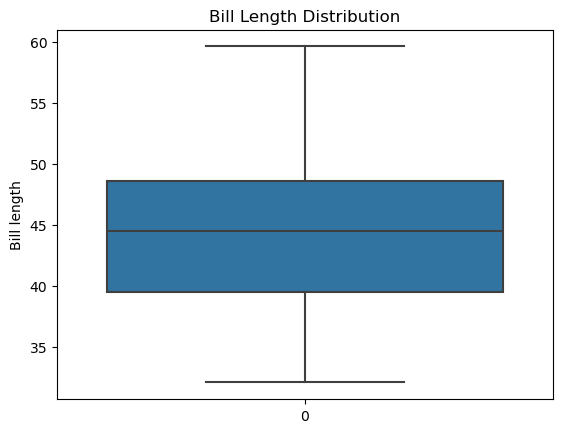

In [94]:
# distribution of bill length
sns.boxplot(peng['bill_length_mm'].astype('float'))
plt.ylabel('Bill length')
plt.title('Bill Length Distribution')

Text(0.5, 1.0, 'Bill Depth Distribution')

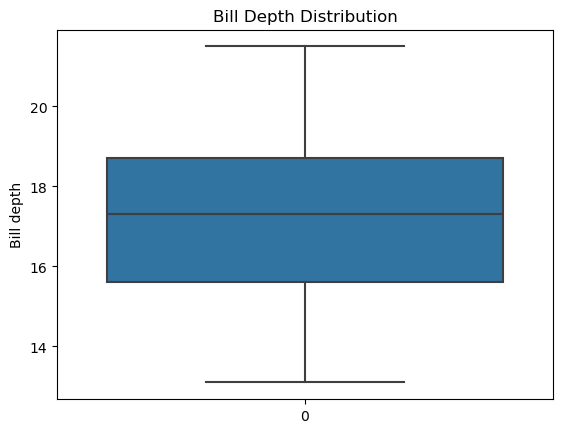

In [95]:
sns.boxplot(peng['bill_depth_mm'].astype('float'))
plt.ylabel('Bill depth')
plt.title('Bill Depth Distribution')

Text(0.5, 1.0, 'Flipper Length Distribution')

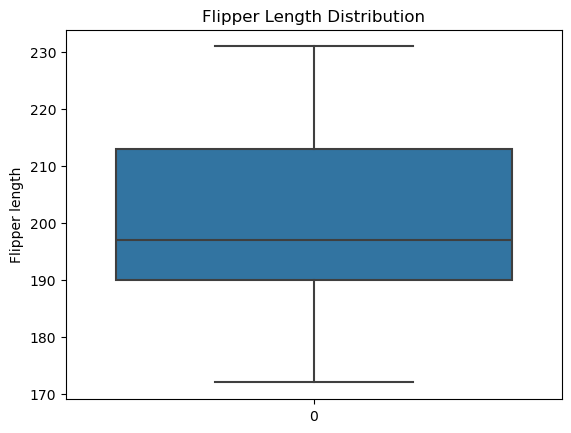

In [96]:
sns.boxplot(peng['flipper_length_mm'].astype('float'))
plt.ylabel('Flipper length')
plt.title('Flipper Length Distribution')

Text(0.5, 1.0, 'Body Mass Distribution')

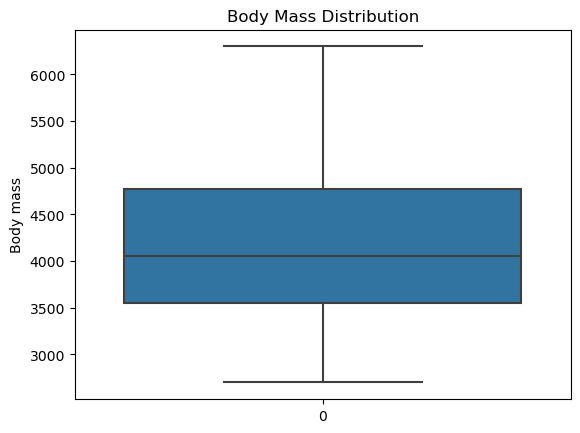

In [97]:
sns.boxplot(peng['body_mass_g'].astype('float'))
plt.ylabel('Body mass')
plt.title('Body Mass Distribution')

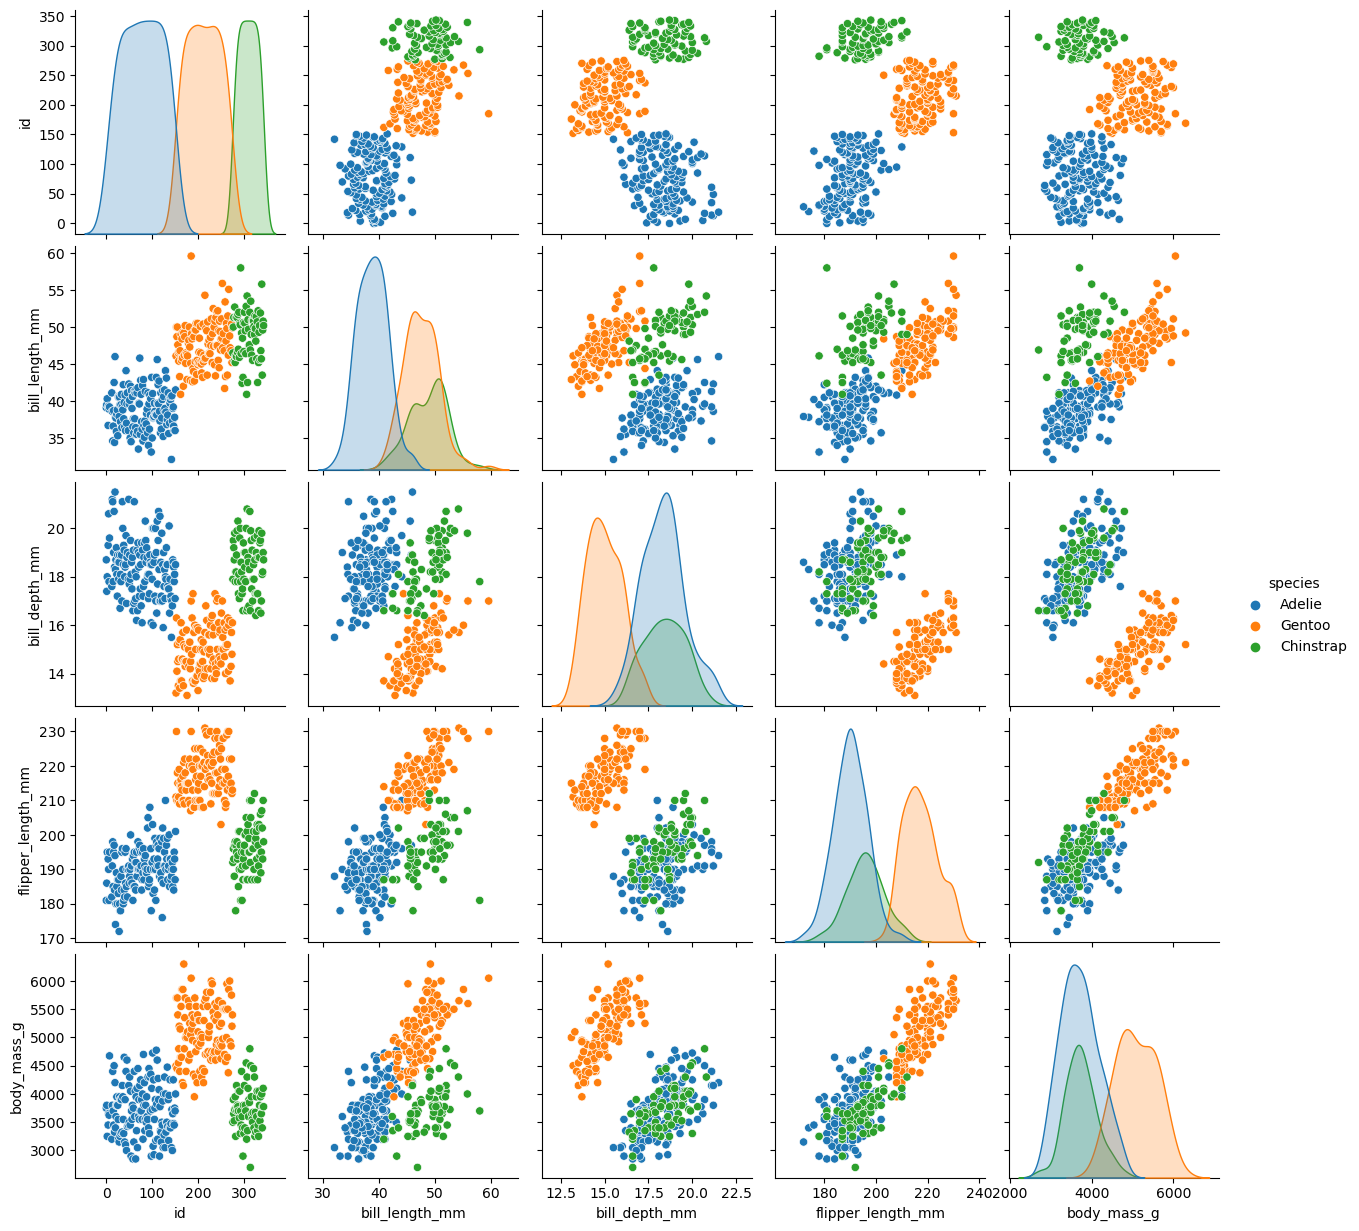

In [98]:
sns.pairplot(peng, hue = 'species')

# Preprocessing

In [100]:
X = peng.drop('species', axis = 1) # assigning the variables to 'X', excluding the 'species' column

ss = StandardScaler()              # Instantiating StandardScaler
X_scaled = ss.fit_transform(X)     # Scaling the variables

# Model Building

In [102]:
# Fit K-means and evaluate inertia for different values of k.
num_clusters = [i for i in range(2, 11)]

def kmeans_inertia(num_clusters, X_vals):
    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=5826)
        kms.fit(X_vals)
        inertia.append(kms.inertia_)

    return inertia

inertia = kmeans_inertia(num_clusters,X_scaled)
inertia

[827.7612849773947,
 434.8886204340264,
 357.88109039482646,
 286.06354898529804,
 247.10071470600582,
 225.0233769592375,
 206.81392054204943,
 194.00737268561204,
 184.92131932128316]

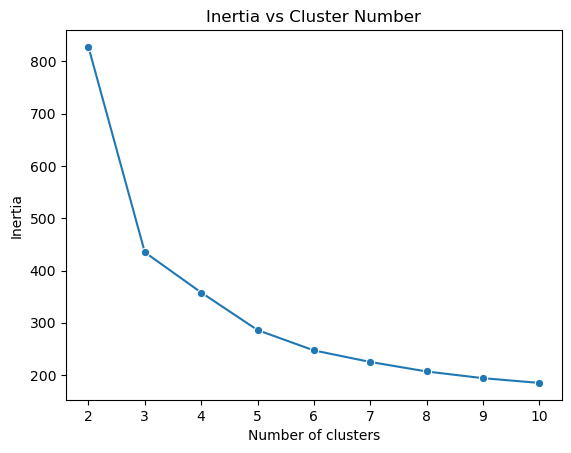

In [103]:
# Line plot to show relationship between cluster number and inertia
sns.lineplot(x=num_clusters, y=inertia, marker = 'o')
plt.xlabel('Number of clusters');
plt.ylabel('Inertia');
plt.title('Inertia vs Cluster Number');

# Results and Evaluation
With the use of the silhouette_score() function, which studies the distance between clusters.
A function called kmeans_sil that takes in num_clusters and x_vals (X_scaled) and returns a list of each k-value's silhouette score.

In [105]:
# Writing a function taht returns a list of each k-value's score.
def kmeans_sil(num_clusters, x_vals):
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=5826)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))

    return sil_score


sil_score = kmeans_sil(num_clusters, X_scaled)
sil_score

[0.45673967878032784,
 0.5445534609977813,
 0.47857068422251364,
 0.3786615737479399,
 0.35074090548261844,
 0.3215876258554186,
 0.28618936534162975,
 0.2791420206902604,
 0.2595362811731064]

Text(0.5, 1.0, 'Silhouette Score vs Number of CLusters')

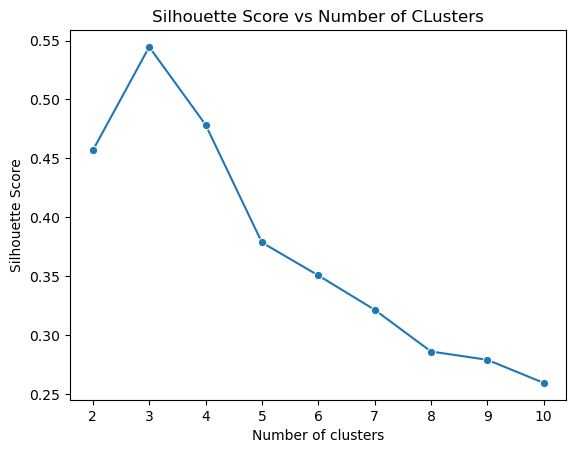

In [106]:
# Line plot to show relationship between cluster number and silhouette score
sns.lineplot(x=num_clusters, y=sil_score, marker = 'o')
plt.xlabel('Number of clusters');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score vs Number of CLusters')

The highest silhouette score is at k = 3, meaning the clustering is best when there are 3 clusters. The chart denotes a decrease in silhouette score as cluster number increases, indicating that higher cluster numbers lead to poorer separation.

### Optimal K Value

In [109]:
# fit a three-cluster model to the dataset

kmeans3 = KMeans(n_clusters=3,random_state=5826)
kmeans3.fit(X_scaled)
# unique labels of the model
print('Unique labels:', np.unique(kmeans3.labels_))

Unique labels: [0 1 2]


creating a new column cluster that indicates cluster assignment in the ~pend~ DataFrame.

In [111]:
peng['cluster'] = kmeans3.labels_
peng.head()

,id,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,cluster
0,0,Adelie,39.1,18.7,181.0,3750.0,0
1,1,Adelie,39.5,17.4,186.0,3800.0,0
2,2,Adelie,40.3,18.0,195.0,3250.0,0
4,4,Adelie,36.7,19.3,193.0,3450.0,0
5,5,Adelie,39.3,20.6,190.0,3650.0,0


Using `groupby` to verify if any `'cluster'` can be differentiated by `'species'`.

In [113]:
peng['cluster'] = kmeans3.labels_
pd.crosstab(peng['species'], peng['cluster'])

cluster,0,1,2
species,,,
Adelie,146,0,0
Chinstrap,0,0,68
Gentoo,0,119,0


In [114]:
# Adjusted Rand Index value
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(peng['species'], peng['cluster'])
print(f'Adjusted Rand Index: {ari:.4f}')

Adjusted Rand Index: 1.0000


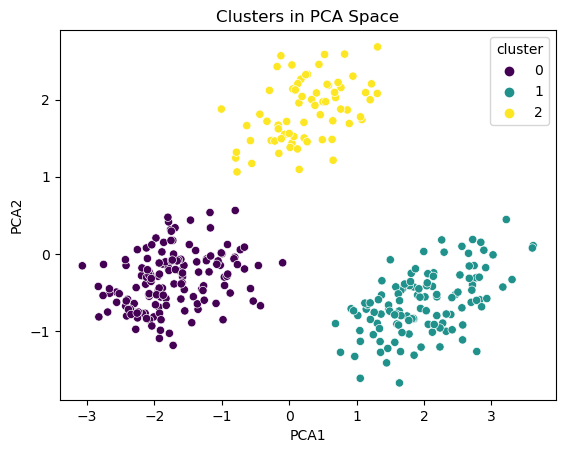

In [115]:
# Visualising clusters using scatterplot and PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

peng['PCA1'], peng['PCA2'] = X_pca[:, 0], X_pca[:, 1]

sns.scatterplot(x=peng['PCA1'], y=peng['PCA2'], hue=peng['cluster'], palette='viridis')
plt.title("Clusters in PCA Space")
plt.show()

# Results:
The K-Means algorithm achieved a perfect clustering result (ARI = 1), demonstrating how well the features naturally separated the penguin species.
I visualised the clusters using scatter plots and PCA to show clear separation between the groups.